# Spotify 1 Million Tracks - Tratamento e Modelação

### Importe das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, r2_score, confusion_matrix,f1_score, classification_report
from sklearn.linear_model import LinearRegression, TweedieRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
%matplotlib inline


# Para visualizar os valores com cinco casas decimais
# pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Tratamento dos Dados

Carregar o dataset, previamente analisado

In [2]:
data = pd.read_csv('data.csv')

Eliminar coluns irrelevantes:
id e name

In [3]:
# Drop Id and Track Id columns
data.drop(['id', 'release_date'], axis=1, inplace=True, errors='ignore')
data

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,I Found You,70,0.0385,129.916,0.4720,2020


Remover duplicados

In [4]:
data.drop_duplicates(inplace=True)
data

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,I Found You,70,0.0385,129.916,0.4720,2020


Tratamento dos artistas

In [5]:
data["artists"] = data["artists"].str.replace("[\[\]']", "", regex=True)
data['artists'] = data['artists'].str.split(', ')
data = data.explode('artists')
data

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.9950,Carl Woitschach,0.708,158648,0.1950,0,0.56300,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,0.9940,Robert Schumann,0.379,282133,0.0135,0,0.90100,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
1,0.9940,Vladimir Horowitz,0.379,282133,0.0135,0,0.90100,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,0.6040,Seweryn Goszczyński,0.749,104300,0.2200,0,0.00000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,0.9950,Francisco Canaro,0.781,180760,0.1300,0,0.88700,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169906,0.5380,Kygo,0.514,180700,0.5390,0,0.00233,7,0.1080,-9.332,1,How Would I Know,70,0.1050,123.700,0.1530,2020
169906,0.5380,Oh Wonder,0.514,180700,0.5390,0,0.00233,7,0.1080,-9.332,1,How Would I Know,70,0.1050,123.700,0.1530,2020
169907,0.0714,Cash Cash,0.646,167308,0.7610,0,0.00000,1,0.2220,-2.557,1,I Found You,70,0.0385,129.916,0.4720,2020
169907,0.0714,Andy Grammer,0.646,167308,0.7610,0,0.00000,1,0.2220,-2.557,1,I Found You,70,0.0385,129.916,0.4720,2020


Encoding dos artistas

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['artists'] = label_encoder.fit_transform(data['artists'])

Encoding do nome da música

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['name'] = label_encoder.fit_transform(data['name'])

<Axes: >

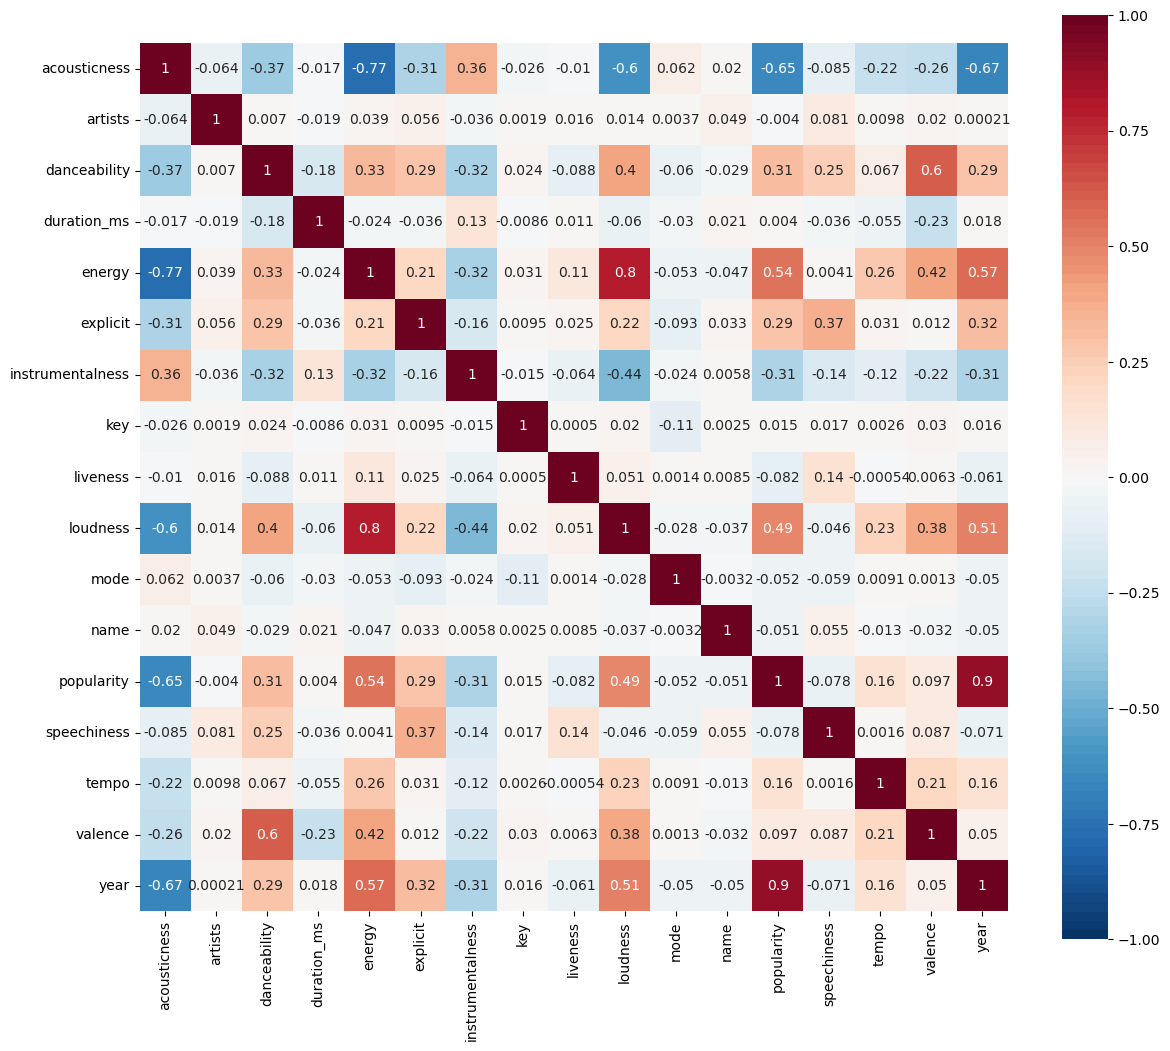

In [8]:
corr_matrix = data.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, cmap=sns.color_palette("RdBu_r", 100))

Removemos a coluna year porque está muito correlacionada com a popularidade

In [9]:
data.drop(['year'], axis=1, inplace=True, errors='ignore')

### Problema de Classificação

Uma outra forma de resolver este problema de previsão da popularidade de uma música consiste em transformar a feature 'popularity', target do nosso problema, numa feature discreta, dividindo a gama de valores contínuos (0 a 100) numa série de bins, ou seja intervalos de popularidade. Por exemplo, para 10 bins, o objetivo passaria a ser o de prever qual o nível de popularidade de uma música (Nível 0 - 0..10, Nível 1 - 10..20, etc)

Vamos então transformar a feature 'popularity' numa feature discreta, recorrendo à funcionalidade KBinsDiscretizer do módulo Sci-kit learn.
Este módulo permite realizar binning de duas estratégias diferentes:

- ‘uniform’: All bins in each feature have identical widths.

- ‘quantile’: All bins in each feature have the same number of points.

In [10]:
data = data.copy()
estimator = preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
data['popularity'] = estimator.fit_transform(data[['popularity']])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225405 entries, 0 to 169908
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      225405 non-null  float64
 1   artists           225405 non-null  int64  
 2   danceability      225405 non-null  float64
 3   duration_ms       225405 non-null  int64  
 4   energy            225405 non-null  float64
 5   explicit          225405 non-null  int64  
 6   instrumentalness  225405 non-null  float64
 7   key               225405 non-null  int64  
 8   liveness          225405 non-null  float64
 9   loudness          225405 non-null  float64
 10  mode              225405 non-null  int64  
 11  name              225405 non-null  int64  
 12  popularity        225405 non-null  float64
 13  speechiness       225405 non-null  float64
 14  tempo             225405 non-null  float64
 15  valence           225405 non-null  float64
dtypes: float64(10), int64(6)


/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


array([[<Axes: title={'center': 'popularity'}>]], dtype=object)

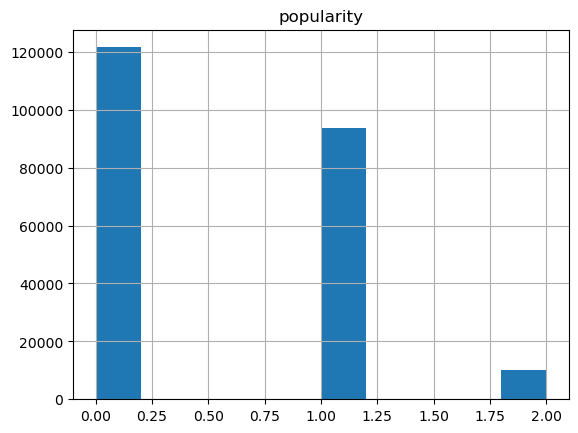

In [11]:
data.hist(column='popularity')

In [12]:
data.groupby(by=['popularity']).mean()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,speechiness,tempo,valence
popularity,,,,,,,,,,,,,,,
0.0,0.742652,13881.807374,0.477228,236663.931304,0.336965,0.022298,0.255860,5.115439,0.223094,-14.522652,0.725670,67985.196518,0.104090,111.452921,0.485678
1.0,0.321029,13738.940476,0.567543,244523.644095,0.589753,0.152900,0.099385,5.240381,0.196654,-9.417746,0.692225,64696.867999,0.087733,119.371685,0.526222
2.0,0.238334,13646.250244,0.651946,219504.821533,0.635031,0.361040,0.031701,5.162331,0.180978,-6.972628,0.615783,63728.662722,0.113664,120.781014,0.504952


## Modelação 

Partição dos Dados entre dados de treino e teste

In [13]:
X = data.drop(['popularity'], axis=1)
y = data['popularity']
X

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,speechiness,tempo,valence
0,0.9950,4166,0.708,158648,0.1950,0,0.56300,10,0.1510,-12.428,1,96100,0.0506,118.469,0.7790
1,0.9940,20519,0.379,282133,0.0135,0,0.90100,8,0.0763,-28.454,1,34247,0.0462,83.972,0.0767
1,0.9940,26210,0.379,282133,0.0135,0,0.90100,8,0.0763,-28.454,1,34247,0.0462,83.972,0.0767
2,0.6040,21595,0.749,104300,0.2200,0,0.00000,5,0.1190,-19.924,0,18622,0.9290,107.177,0.8800
3,0.9950,8356,0.781,180760,0.1300,0,0.88700,1,0.1110,-14.734,0,11093,0.0926,108.003,0.7200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169906,0.5380,13656,0.514,180700,0.5390,0,0.00233,7,0.1080,-9.332,1,45940,0.1050,123.700,0.1530
169906,0.5380,18049,0.514,180700,0.5390,0,0.00233,7,0.1080,-9.332,1,45940,0.1050,123.700,0.1530
169907,0.0714,4302,0.646,167308,0.7610,0,0.00000,1,0.2220,-2.557,1,47513,0.0385,129.916,0.4720
169907,0.0714,1534,0.646,167308,0.7610,0,0.00000,1,0.2220,-2.557,1,47513,0.0385,129.916,0.4720


In [14]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Modelo de Árvores de Decisão

Vamos agora criar um modelo de árvores de decisão para prever o intervalo de popularidade de uma música.

In [15]:
"""
Hyperparameters:
criterion - The function to measure the quality of a split.
    "entropy" - Entropy = 0 means it is pure split (all instances are of only 1 class). Entropy = 1 means it is impure split.
    "gini" - 
max_depth - The maximum number of levels in the tree.
min_samples_leaf - The minimum number of samples allowed in a leaf.
min_samples_split - The minimum number of samples required to split an internal node.
"""
classifier = DecisionTreeClassifier(random_state=2023, criterion='entropy', splitter='best') 

In [16]:
y_train

158485    1.0
67032     0.0
72009     0.0
123893    1.0
70867     0.0
         ... 
102634    1.0
154169    0.0
161682    0.0
161803    0.0
133470    1.0
Name: popularity, Length: 157783, dtype: float64

In [17]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=2023)

In [18]:
d_tree_predictions = classifier.predict(X_test)
d_tree_predictions

array([0., 0., 2., ..., 0., 0., 0.])

In [19]:
df = pd.DataFrame(d_tree_predictions, columns = ['prediction'])
pred_actual = df.merge(right=y_test, left_index=True, right_index=True)
pred_actual.head()

,prediction,popularity
4,1.0,0.0
6,0.0,0.0
8,1.0,0.0
11,1.0,0.0
12,1.0,0.0


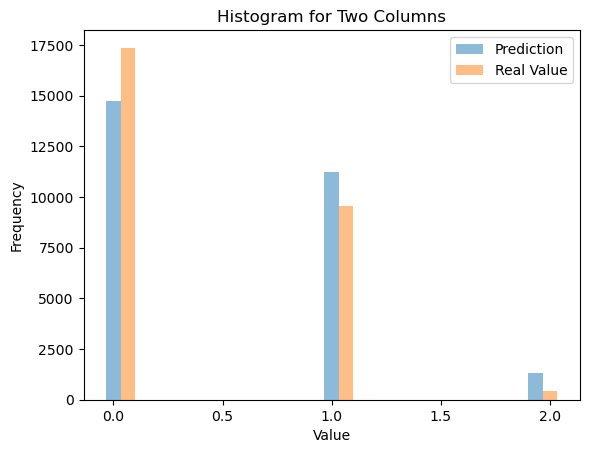

In [20]:
# Create histograms for each column
plt.hist(pred_actual['prediction'], align='left', bins=30, alpha=0.5, label='Prediction')
plt.hist(pred_actual['popularity'], align='right', bins=30, alpha=0.5, label='Real Value')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram for Two Columns')
plt.legend()  # Show legend with labels

# Display the plot
plt.show()

In [21]:
confusion_matrix(y_test, d_tree_predictions)

array([[29618,  6356,   311],
       [ 6671, 19927,  1656],
       [  300,  1360,  1423]])

In [22]:
print(classification_report(y_test, d_tree_predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81     36285
         1.0       0.72      0.71      0.71     28254
         2.0       0.42      0.46      0.44      3083

    accuracy                           0.75     67622
   macro avg       0.65      0.66      0.66     67622
weighted avg       0.75      0.75      0.75     67622



##### Árvores de Decisão com cross-validation

In [23]:
cross_valid_model = LinearRegression()

In [24]:
scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')

In [25]:
scores.mean()

0.7453020954265964

In [26]:
scores.std()

0.0023142203309549727

Grid Search

In [27]:
param_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

grid_clf_dtrees = GridSearchCV(classifier, param_grid, refit=True, verbose=3)

In [28]:
grid_clf_dtrees.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.746 total time=   0.9s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.739 total time=   0.9s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.742 total time=   0.9s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.740 total time=   0.9s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.743 total time=   0.8s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.750 total time=   1.1s
[CV 2/5] END .......criterion=gini, max_depth=5;, score=0.743 total time=   1.1s
[CV 3/5] END .......criterion=gini, max_depth=5;, score=0.747 total time=   1.1s
[CV 4/5] END .......criterion=gini, max_depth=5;, score=0.743 total time=   1.3s
[CV 5/5] END .......criterion=gini, max_depth=5;, score=0.746 total time=   1.2s
[CV 1/5] END .......criterion=gini, max_depth=6;, score=0.751 total time=   1.6s
[CV 2/5] END .......criterion=gini, max_depth=6;, score=0.745 total time=   1.5s
[CV 3/5] END .......criterio

KeyboardInterrupt: 

In [ ]:
grid_clf_dtrees.best_params_

{'criterion': 'gini', 'max_depth': 11}

In [ ]:
grid_clf_dtrees.best_estimator_

DecisionTreeClassifier(max_depth=11, random_state=2023)

In [ ]:
grid_dtrees_predictions = grid_clf_dtrees.predict(X_test)
print(classification_report(y_test, grid_dtrees_predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92     22247
         1.0       0.71      0.77      0.74     22298
         2.0       0.84      0.76      0.80     23077

    accuracy                           0.82     67622
   macro avg       0.82      0.82      0.82     67622
weighted avg       0.82      0.82      0.82     67622



### Logistic Regression

In [ ]:
from sklearn import linear_model

In [ ]:
log_reg = linear_model.LogisticRegression(solver = 'lbfgs', max_iter = 1000)

In [ ]:
log_reg.fit(X_train, y_train)

/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
lr_predictions = log_reg.predict(X_test)
lr_predictions

array([0., 2., 0., ..., 1., 0., 2.])

In [ ]:
df = pd.DataFrame(lr_predictions, columns = ['prediction_binned'])
pred_actual = df.merge(right=y_test, left_index=True, right_index=True)
pred_actual.head()

,prediction_binned,popularity
4,2.0,0.0
6,2.0,0.0
8,0.0,0.0
11,2.0,0.0
12,0.0,0.0


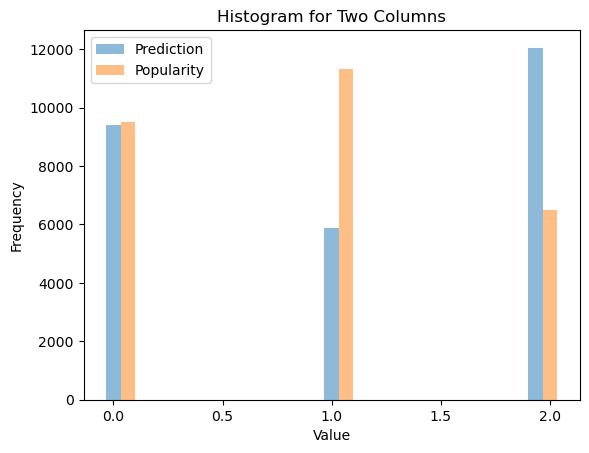

In [ ]:
# Create histograms for each column
plt.hist(pred_actual['prediction_binned'], align='left', bins=30, alpha=0.5, label='Prediction')
plt.hist(pred_actual['popularity'], align='right', bins=30, alpha=0.5, label='Popularity')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram for Two Columns')
plt.legend()  # Show legend with labels

# Display the plot
plt.show()

In [ ]:
confusion_matrix(y_test, lr_predictions)

array([[13625,  5173,  3449],
       [ 7047,  6387,  8864],
       [ 2694,  3228, 17155]])

In [ ]:
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

         0.0       0.58      0.61      0.60     22247
         1.0       0.43      0.29      0.34     22298
         2.0       0.58      0.74      0.65     23077

    accuracy                           0.55     67622
   macro avg       0.53      0.55      0.53     67622
weighted avg       0.53      0.55      0.53     67622



Grid Search

In [ ]:
param_grid = {"C" : np.logspace(-3,3,7), "penalty" : ["l1","l2"]}

grid_clf_lr = GridSearchCV(log_reg, param_grid, refit=True, verbose=3)

In [ ]:
grid_clf_lr.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s


/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.553 total time=  45.4s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.414 total time=   7.8s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.417 total time=  10.2s


/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.541 total time=  39.7s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.412 total time=   9.3s
[CV 1/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ................C=0.01, penalty=l2;, score=0.414 total time=  10.4s


/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ................C=0.01, penalty=l2;, score=0.547 total time=  42.6s
[CV 3/5] END ................C=0.01, penalty=l2;, score=0.417 total time=  15.3s
[CV 4/5] END ................C=0.01, penalty=l2;, score=0.411 total time=   7.1s


/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ................C=0.01, penalty=l2;, score=0.544 total time=  38.0s
[CV 1/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s


/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END .................C=0.1, penalty=l2;, score=0.542 total time=  42.0s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.414 total time=   7.9s


/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END .................C=0.1, penalty=l2;, score=0.538 total time=  39.4s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.411 total time=   7.5s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.413 total time=  13.7s
[CV 1/5] END ...................C=1.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...................C=1.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ...................C=1.0, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ...................C=1.0, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ...................C=1.0, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END .................C=1.0, penalty=l2;, score=0.414 total time=  13.2s
[CV 2/5] END .................C=1.0, penalty=l2;, score=0.414 total time=   8.1s


/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END .................C=1.0, penalty=l2;, score=0.540 total time=  37.2s
[CV 4/5] END .................C=1.0, penalty=l2;, score=0.411 total time=   6.4s
[CV 5/5] END .................C=1.0, penalty=l2;, score=0.412 total time=   9.8s
[CV 1/5] END ..................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ..................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ..................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ..................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ................C=10.0, penalty=l2;, score=0.541 total time=  29.4s
[CV 2/5] END ................C=10.0, penalty=l2;, score=0.414 total time=   6.6s
[CV 3/5] END ................C=10.0, penalty=l2;, score=0.417 total time=   8.4s
[CV 4/5] END ................C=10.0, penalty=l2;, score=0.411 total time=   8.2s


/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ................C=10.0, penalty=l2;, score=0.550 total time=  36.2s
[CV 1/5] END .................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...............C=100.0, penalty=l2;, score=0.414 total time=   8.5s
[CV 2/5] END ...............C=100.0, penalty=l2;, score=0.414 total time=   8.1s
[CV 3/5] END ...............C=100.0, penalty=l2;, score=0.417 total time=   7.2s
[CV 4/5] END ...............C=100.0, penalty=l2;, score=0.536 total time=  23.5s
[CV 5/5] END ...............C=100.0, penalty=l2;, score=0.413 total time=   8.7s
[CV 1/5] END ................C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...............

/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..............C=1000.0, penalty=l2;, score=0.543 total time=  33.8s
[CV 3/5] END ..............C=1000.0, penalty=l2;, score=0.417 total time=   7.3s
[CV 4/5] END ..............C=1000.0, penalty=l2;, score=0.411 total time=   6.8s
[CV 5/5] END ..............C=1000.0, penalty=l2;, score=0.413 total time=   8.7s


/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/jmartins9/miniconda3/envs/Teste/lib/python3.10/site-packages/sklearn/linear_model/_

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [ ]:
grid_clf_lr.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [ ]:
grid_clf_lr.best_estimator_

LogisticRegression(C=0.001, max_iter=1000)

In [ ]:
grid_lr_predictions = grid_clf_lr.predict(X_test)
print(classification_report(y_test, grid_lr_predictions))

              precision    recall  f1-score   support

         0.0       0.58      0.61      0.59     22247
         1.0       0.43      0.29      0.34     22298
         2.0       0.56      0.71      0.63     23077

    accuracy                           0.54     67622
   macro avg       0.52      0.53      0.52     67622
weighted avg       0.52      0.54      0.52     67622



In [ ]:
df = pd.DataFrame(grid_lr_predictions, columns = ['prediction_binned'])
pred_actual = df.merge(right=y_test, left_index=True, right_index=True)
pred_actual.head()

,prediction_binned,popularity_binned
4,1.0,0.0
59,2.0,0.0
75,2.0,0.0
81,2.0,0.0
84,2.0,0.0


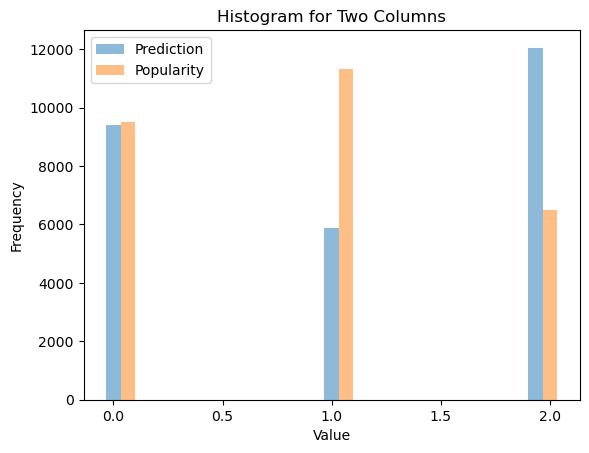

In [ ]:
# Create histograms for each column
plt.hist(pred_actual['prediction_binned'], align='left', bins=30, alpha=0.5, label='Prediction')
plt.hist(pred_actual['popularity'], align='right', bins=30, alpha=0.5, label='Popularity')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram for Two Columns')
plt.legend()  # Show legend with labels

# Display the plot
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
predictions = rf.predict(X_test)
predictions

array([1., 0., 1., ..., 0., 1., 2.])

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92     22247
         1.0       0.70      0.83      0.76     22298
         2.0       0.87      0.74      0.80     23077

    accuracy                           0.82     67622
   macro avg       0.83      0.82      0.83     67622
weighted avg       0.83      0.82      0.83     67622



### Redes Neuronais

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from scikeras.wrappers import KerasClassifier

2023-11-22 22:06:34.519819: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation=activation)) # output

    # Compile the model
    model.compile(loss='binary_crossentropy',
        optimizer='sgd',
        metrics=['accuracy'])
    return model

Construção do modelo

In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,905
Trainable params: 1,905
Non-trainable params: 0
_________________________________________________________________


2023-11-22 22:06:45.380694: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


GridSearch

In [ ]:
#optimizer = ['SGD', 'RMSprop', 'Adagrad']
optimizer = ['SGD'] # foi o que apresentou melhores resultados
param_grid = dict(optimizer = optimizer)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=2021)

Keras Classifier

In [ ]:
model = KerasClassifier(model = build_model, batch_size = 32, validation_split=0.2, epochs=10)

Criar um modelo Grid Search

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring='accuracy', refit='True', verbose=1)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Epoch 1/10
3156/3156 [==============================] - 19s 6ms/step - loss: 15.5659 - accuracy: 0.3271 - val_loss: 15.5808 - val_accuracy: 0.3305
Epoch 2/10
3156/3156 [==============================] - 19s 6ms/step - loss: 15.6045 - accuracy: 0.3293 - val_loss: 15.5808 - val_accuracy: 0.3305
Epoch 3/10
3156/3156 [==============================] - 20s 6ms/step - loss: 15.6045 - accuracy: 0.3293 - val_loss: 15.5808 - val_accuracy: 0.3305
Epoch 4/10
3156/3156 [==============================] - 17s 5ms/step - loss: 15.6045 - accuracy: 0.3293 - val_loss: 15.5808 - val_accuracy: 0.3305
Epoch 5/10
3156/3156 [==============================] - 17s 5ms/step - loss: 15.6045 - accuracy: 0.3293 - val_loss: 15.5808 - val_accuracy: 0.3305
Epoch 6/10
3156/3156 [==============================] - 18s 6ms/step - loss: 15.6045 - accuracy: 0.3293 - val_loss: 15.5808 - val_accuracy: 0.3305
Epoch 7/10
3156/3156 [==============================] - 17s

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=KerasClassifier(batch_size=32, epochs=10, model=<function build_model at 0x7f3fa8c81870>, validation_split=0.2),
             param_grid={'optimizer': ['SGD']}, refit='True',
             scoring='accuracy', verbose=1)

In [ ]:
y_train

158485    1.0
67032     1.0
72009     0.0
123893    2.0
70867     0.0
         ... 
102634    2.0
154169    0.0
161682    0.0
161803    0.0
133470    2.0
Name: popularity, Length: 157783, dtype: float64

Verificar qual é o valor e os parâmetros do melhor resultado

In [ ]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: 0.330295 using {'optimizer': 'SGD'}


In [ ]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

In [ ]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.330295 (0.001738) with: {'optimizer': 'SGD'}


Encontrar o melhor modelo

In [ ]:
best_mlp_model = grid_search.best_estimator_ 
print(best_mlp_model)

KerasClassifier(
	model=<function build_model at 0x7f3fa8c81870>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=SGD
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)


Usar o melhor modelo

In [ ]:
best_mlp_model.fit(X_train, y_train, epochs = 40, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/40
3717/4931 [=====================>........] - ETA: 6s - loss: 15.5899 - accuracy: 0.3301

In [ ]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('Model Performance')
plt.ylabel('Loss Values')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
pd.DataFrame(best_mlp_model.history_).plot(figsize=(8, 5))
plt.show()

Previsões

In [ ]:
predictions = best_mlp_model.predict(X_test)
predictions

Observar os valores obtidos vs os valores reais

In [ ]:
plt.scatter(y_test, predictions)

Avaliar o modelo

In [ ]:
print(classification_report(y_test, predictions))